In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import matplotlib as mat
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import json

In [3]:
df=pd.read_csv('C:/Users/SUSHMA/Downloads/DS1_C8_V3_ND_Sprint2_Data Analysis Using Python_Dataset (2).csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",04-09-1992,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],26-12-2011,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

### Task 1 

In [7]:
df.shape   ## number of rows and column

(4803, 20)

### Task 2

In [8]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [9]:
def separate_datatypes(df):
    cat=list(df.select_dtypes(include='object').columns)
    num=list(df.select_dtypes(exclude='object').columns)
    print(tabulate({'categorical':cat,'numerical':num},headers='keys'))
separate_datatypes(df)

categorical           numerical
--------------------  ------------
genres                budget
homepage              id
keywords              popularity
original_language     revenue
original_title        runtime
overview              vote_average
production_companies  vote_count
production_countries
release_date
spoken_languages
status
tagline
title


In [10]:
def info_of_cat(col):
    print(f" unique values of {col} is : {df[col].unique()}")
    print(f" mode of {col} is : {df[col].mode()[0]}")
    print(f" total missing values in {col} is : {df[col].isnull().sum()}")
          

In [11]:
info_of_cat('homepage')

 unique values of homepage is : ['http://www.avatarmovie.com/'
 'http://disney.go.com/disneypictures/pirates/'
 'http://www.sonypictures.com/movies/spectre/' ...
 'http://www.primermovie.com'
 'http://www.hallmarkchannel.com/signedsealeddelivered'
 'http://shanghaicalling.com/']
 mode of homepage is : http://www.missionimpossible.com/
 total missing values in homepage is : 3091


In [12]:
df['homepage'].fillna('http://www.missionimpossible.com/',inplace=True)

In [13]:
info_of_cat('tagline')

 unique values of tagline is : ['Enter the World of Pandora.'
 'At the end of the world, the adventure begins.' 'A Plan No One Escapes'
 ...
 "He didn't come looking for trouble, but trouble came looking for him."
 "A newlywed couple's honeymoon is upended by the arrivals of their respective sisters."
 'A New Yorker in Shanghai']
 mode of tagline is : Based on a true story.
 total missing values in tagline is : 844


In [14]:
df['tagline'].fillna('Based on a true story.',inplace=True)

In [15]:
df['overview'].fillna(df['overview'].mode(),inplace=True)

In [16]:
df['release_date'].fillna(df['release_date'].mode()[0],inplace=True)

In [17]:
df['runtime'].fillna(df['runtime'].mean(),inplace=True)

In [18]:
df.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

### Task 3

In [19]:
task3=df[df['budget']>220000]
task3

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,450000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",http://www.malevolencemovie.com/,54702,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 6259,...",en,Malevolence,It's ten years after the kidnapping of Martin ...,1.077321,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-09-2004,0,90.0,"[{""iso_639_1"": ""pl"", ""name"": ""Polski""}, {""iso_...",Released,Based on a true story.,Malevolence,4.9,14
4682,13000000,"[{""id"": 27, ""name"": ""Horror""}]",http://www.missionimpossible.com/,69270,[],en,Super Hybrid,"Late one night, a mysterious car is brought in...",4.009379,"[{""name"": ""TADORA Filmproduktions"", ""id"": 5663...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",01-01-2010,0,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,Super Hybrid,4.6,24
4720,8500000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxsearchlight.com/thebirthofanation/,339408,"[{""id"": 2831, ""name"": ""slavery""}]",en,The Birth of a Nation,"Nat Turner, a former slave in America, 

### Task 4

In [20]:
task4=df[df['revenue']>961000000]
task4

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",22-04-2015,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767
12,200000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,58,"[{""id"": 616, ""name"": ""witch""}, {""id"": 663, ""na...",en,Pirates of the Caribbean: Dead Man's Chest,Captain Jack Sparrow works his way out of a bl...,145.847379,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""JM"", ""name"": ""Jamaica""}, {""is...",20-06-2006,1065659812,151.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Jack is back!,Pirates of the Caribbean: Dead Man's Chest,7.0,5246
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",25-04-2012,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776
17,380000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://disney.go.com/pirates/index-on-stranger...,1865,"[{""id"": 658, ""name"": ""sea""}, {""id"": 1316, ""nam...",en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,135.413856,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",14-05-2011,1045713802,136.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Live Forever Or Die Trying.,Pirates of the Caribbean: On Stranger Tides,6.4,4948
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",18-11-1997,1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562
26,250000000,"[{""id"": 12, ""name"": ""Ad

### Task 5

In [21]:
df=df[(df['budget']!=0)&(df['revenue']!=0)]
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.miramax.com/movie/clerks/,2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",13-09-1994,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755
4788,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",http://www.missionimpossible.com/,692,"[{""id"": 237, ""name"": ""gay""}, {""id"": 900, ""name...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,"[{""name"": ""Dreamland Productions"", ""id"": 407}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12-03-1972,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,An exercise in poor taste.,Pink Flamingos,6.2,110
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",http://

### Task 6

In [22]:
task6=df.nlargest(10,'revenue')
task6

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",18-11-1997,1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",25-04-2012,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",09-06-2015,1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",01-04-2015,1506249360,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",22-04-2015,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767
124,150000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 12, ""...",http://movies.disney.com/frozen,109445,"[{""id"": 2011, ""name"": ""queen""}, {""id"": 4344, ""...",en,Frozen,Young princess Anna of Arendelle dreams about ...,165.125366,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",27-11-2013,1274219009,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Only the act of true love will thaw a frozen h...,Frozen,7.3,5295
31,200000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/ironman3,68721,"[{""id"": 949, ""name"": ""terrorist""}, {""id"": 5597...",en,Iron Man 3,When Tony Stark's world is torn apart by a for...,77.682080,"[

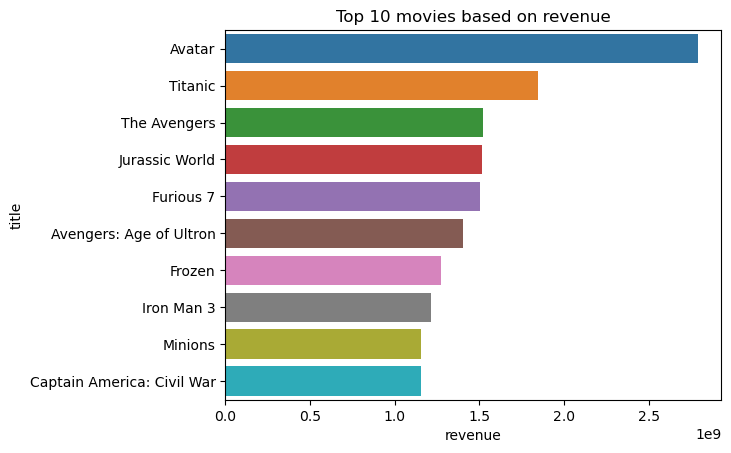

In [51]:
plt.title('Top 10 movies based on revenue')
sns.barplot(y=task6['title'],x=task6['revenue'])
plt.show()

In [23]:
task6a=df.nsmallest(10,'budget')
task6a

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4238,1,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",http://www.missionimpossible.com/,3082,"[{""id"": 1382, ""name"": ""factory""}, {""id"": 1546,...",en,Modern Times,The Tramp struggles to live in modern industri...,28.276480,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",05-02-1936,8500000,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He stands alone as the greatest entertainer of...,Modern Times,8.1,856
3611,4,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.missionimpossible.com/,22649,"[{""id"": 131, ""name"": ""italy""}, {""id"": 428, ""na...",en,A Farewell to Arms,British nurse Catherine Barkley (Helen Hayes) ...,1.199451,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",08-12-1932,25,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Every woman who has loved will understand,A Farewell to Arms,6.2,28
3372,7,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",http://www.missionimpossible.com/,13006,"[{""id"": 3528, ""name"": ""flooding""}, {""id"": 9685...",en,Split Second,"In a futuristic London, the rising sea levels ...",4.857028,"[{""name"": ""Entertainment"", ""id"": 7676}, {""name...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",01-05-1992,5,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's seen the future. Now he has to kill it.,Split Second,5.7,63
3419,7,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.missionimpossible.com/,38415,"[{""id"": 4344, ""name"": ""musical""}, {""id"": 18705...",en,Bran Nue Dae,In the Summer of 1965 a young man is filled wi...,0.050456,[],[],09-08-2009,7,82.0,[],Released,Bran Nue Dae,Bran Nue Dae,5.2,6
4608,8,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 27, ""na...",http://www.missionimpossible.com/,11980,"[{""id"": 290, ""name"": ""angel""}, {""id"": 3648, ""n...",en,The Prophecy,The angel Gabriel comes to Earth to collect a ...,11.818333,"[{""name"": ""Dimension Films"", ""id"": 7405}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",01-09-1995,16,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"On ancient ground, at the edge of the world, a...",The Prophecy,6.4,138
3131,10,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://hrosss.is/the-film/,217708,"[{""id"": 2673, ""name"": ""horse""}, {""id"": 3373, ""...",is,Hross í oss,A country romance about the human streak in th...,1.617943,"[{""name"": ""Filmhuset Gruppen"", ""id"": 68384}, {...","[{""iso_3166_1"": ""NO"", ""name"": ""Norway""}, {""iso...",30-08-2013,11,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Based on a true story.,Of Horses and Men,6.9,26
3137,10,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",http://www.missionimpossible.com/,78383,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 7098, ""n...",en,Nurse 3-D,"Abby Russell, a beautiful, dedicated nurse wit...",10.013629,"[{""name"": ""Lions Gate"", ""id"": 6644}, {""name"": ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",28-09-2013,10000000,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Your pain is her pleasure.,Nurse 3-D,4.9,119
2933,11,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://www.missionimpossible.com/,28932,[],en,F.I.S.T.,Johnny Kovak joins the Teamsters trade-union i...,3.375208,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",26-04-1978,11,145.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,F.I.S.T.,6.4,29
1912,25,"[{""id"": 18, 

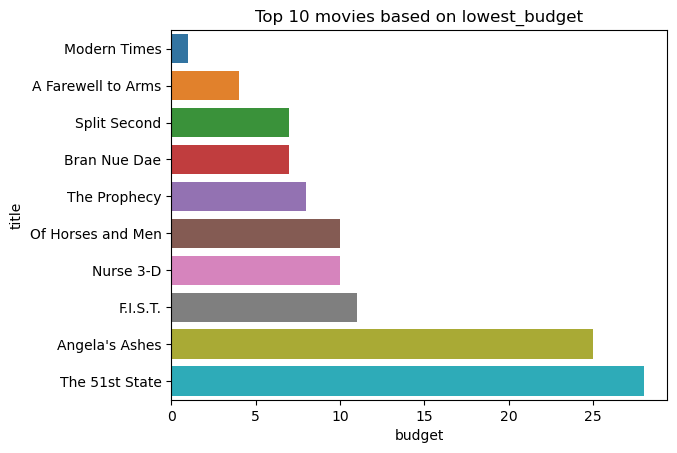

In [50]:
plt.title('Top 10 movies based on lowest_budget')
sns.barplot(y=task6a['title'],x=task6a['budget'])
plt.show()

### task 7

In [25]:
task7=df['popularity'].corr(df['budget'])
print('correlation of popularity of movie and its budget :', task7)

correlation of popularity of movie and its budget : 0.4319901360079751


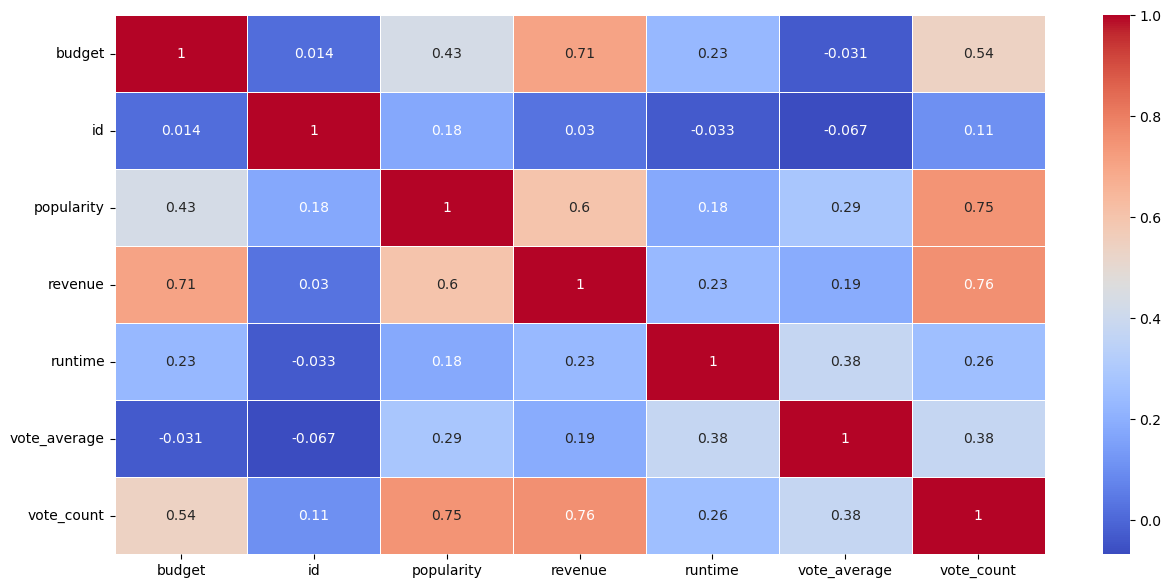

In [49]:
fig,ax=plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(),cbar=True,linewidths=0.5,annot=True,cmap='coolwarm')
plt.show()

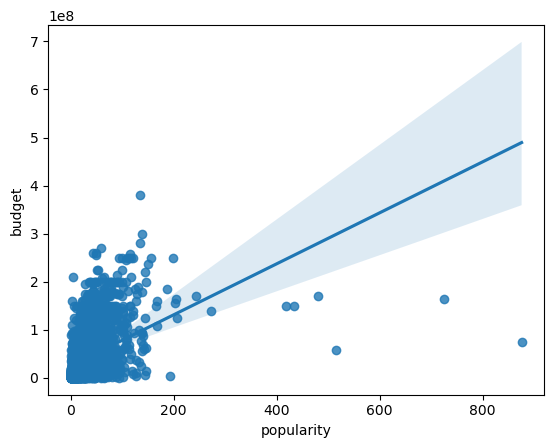

In [52]:
sns.regplot(data = df,x="popularity",y="budget" )
plt.show()

### Task 8 

In [27]:
genre_name=df["genres"].apply(lambda x: [genre["name"] for genre in json.loads(x)])
genre_name

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4773                                         [Comedy]
4788                          [Horror, Comedy, Crime]
4792               [Crime, Horror, Mystery, Thriller]
4796               [Science Fiction, Drama, Thriller]
4798                        [Action, Crime, Thriller]
Name: genres, Length: 3229, dtype: object

In [28]:
task8=df['production_companies'].apply(lambda x: [genre["name"] for genre in json.loads(x)])
task8

0       [Ingenious Film Partners, Twentieth Century Fo...
1       [Walt Disney Pictures, Jerry Bruckheimer Films...
2                        [Columbia Pictures, Danjaq, B24]
3       [Legendary Pictures, Warner Bros., DC Entertai...
4                                  [Walt Disney Pictures]
                              ...                        
4773              [Miramax Films, View Askew Productions]
4788                              [Dreamland Productions]
4792                                      [Daiei Studios]
4796                                          [Thinkfilm]
4798                                  [Columbia Pictures]
Name: production_companies, Length: 3229, dtype: object

In [29]:
production_company_name = df["production_companies"].apply(lambda x: [production_name["name"] for production_name in json.loads(x)]).explode().value_counts()
production_company_name

Warner Bros.                              280
Universal Pictures                        273
Paramount Pictures                        245
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         167
                                         ... 
HW Two                                      1
Unfinished Films                            1
Infinity Features Entertainment             1
British Columbia Film                       1
Daiei Studios                               1
Name: production_companies, Length: 3564, dtype: int64

# Task 9

In [30]:
production_company_name.nlargest(n=25)

Warner Bros.                              280
Universal Pictures                        273
Paramount Pictures                        245
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         167
New Line Cinema                           142
Relativity Media                          100
Walt Disney Pictures                       96
Touchstone Pictures                        93
Metro-Goldwyn-Mayer (MGM)                  92
Columbia Pictures Corporation              86
Village Roadshow Pictures                  73
Miramax Films                              67
DreamWorks SKG                             67
United Artists                             64
Regency Enterprises                        59
Dune Entertainment                         54
TriStar Pictures                           50
Lionsgate                                  49
Canal+                                     48
Summit Entertainment                       48
Fox Searchlight Pictures          

### Task 10 

In [4]:
task10=df.sort_values('revenue',ascending=False)
task10

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",18-11-1997,1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",25-04-2012,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",09-06-2015,1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",01-04-2015,1506249360,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3200,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,41248,[],fr,La Fille du RER,The Girl on the Train is a 2009 French drama f...,2.351706,"[{""name"": ""France 2 Cin\u00e9ma"", ""id"": 83}, {...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}]",18-03-2009,0,105.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,The Girl on the Train,5.6,10
3199,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 9648, ...",NaN,291081,[],en,Red Riding: In the Year of Our Lord 1974,"It's Yorkshire in 1974, and fear, mistrust and...",7.247023,"[{""name"": ""Revolution Films"", ""id"": 163}, {""na...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",28-02-2009,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"An epic tale of murder, corruption and obsession.",Red Riding: In the Year of Our Lord 1974,7.0,54
3197,6500000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",http://www.flammenogcitronen.dk/,8883,"[{""id"": 782, ""name"": ""assassin""}, {""id"": 792, ...",da,Flammen & Citronen,"During Nazi occupation, red-headed Bent Faursc...",7.028946,"[{""name"": ""Det Danske Filminstitut"", ""id"": 118...","[{""iso_3166_1"": ""CZ"", ""na

In [5]:
top500=task10.head(500)
top500

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",18-11-1997,1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",25-04-2012,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",09-06-2015,1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",01-04-2015,1506249360,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,48000000,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,4256,"[{""id"": 12416, ""name"": ""horror spoof""}]",en,Scary Movie 3,In the third installment of the Scary Movie fr...,36.585509,"[{""name"": ""Dimension Films"", ""id"": 7405}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",24-10-2003,220673217,84.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Great trilogies come in threes.,Scary Movie 3,5.8,912
41,200000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://greenlanternmovie.warnerbros.com/,44912,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 4375...",en,Green Lantern,"For centuries, a small but powerful force of w...",51.872839,"[{""name"": ""De Line Pictures"", ""id"": 2609}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-06-2011,219851172,114.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"In our darkest hour, there will be light.",Green Lantern,5.1,2487
521,60000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.theterminal-themovie.com/,594,"[{""id"": 242, ""name"": ""new york""}, {""id"": 822, ...",en,The Terminal,Viktor Navorski is a man without a country; h

In [6]:
budgets=top500.loc[:,['budget','revenue','runtime']]
budgets

,budget,revenue,runtime
0,237000000,2787965087,162.0
25,200000000,1845034188,194.0
16,220000000,1519557910,143.0
28,150000000,1513528810,124.0
44,190000000,1506249360,137.0
...,...,...,...
1042,48000000,220673217,84.0
41,200000000,219851172,114.0
521,60000000,219417255,128.0
397,85000000,219103655,121.0


In [7]:
import statistics as st
Mean=[]
Median=[]
Mode=[]

for col in budgets:
    Mean.append(budgets[col].mean())
    Median.append(budgets[col].median())
    Mode.append(st.mode(budgets[col]))
    
row_head = ['Mean','Median','Mode']
col_name = ['budget','revenue','runtime']
d_data = pd.DataFrame([Mean,Median,Mode],columns=col_name)
d_data
d_data.insert(0,'Measures',row_head)
d_data


,Measures,budget,revenue,runtime
0,Mean,102803736.0,4.587221e+08,118.626
1,Median,95000000.0,3.630016e+08,116.000
2,Mode,150000000.0,2.787965e+09,115.000


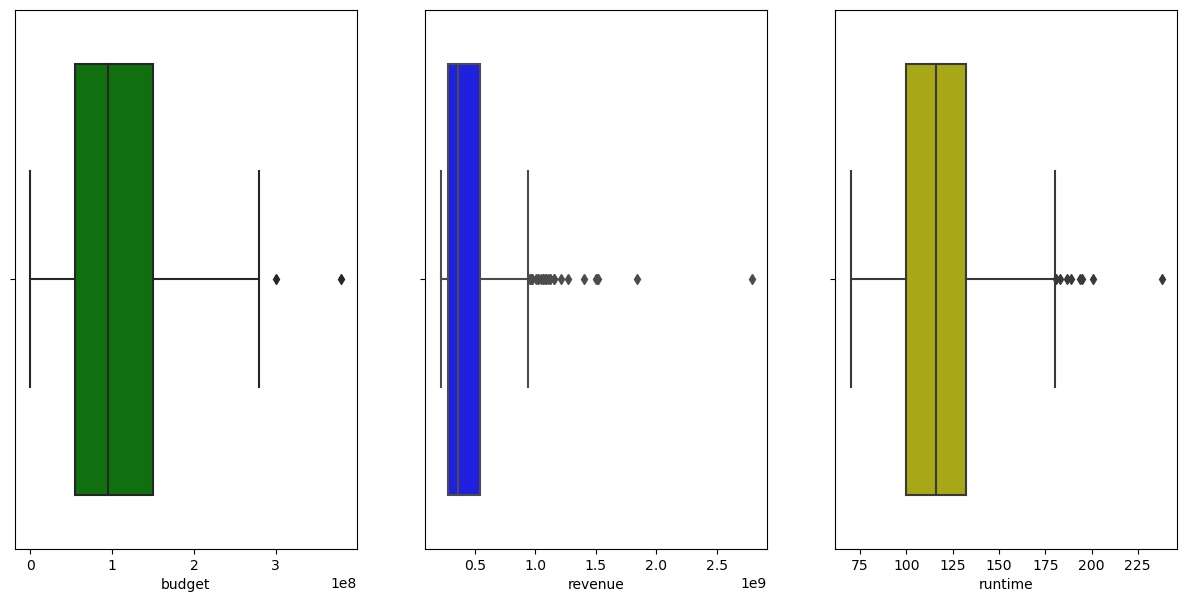

In [8]:
fig,ax=plt.subplots(1,3,figsize=(15,7))
sns.boxplot(x=top500['budget'],ax=ax[0],color='g')
sns.boxplot(x=top500['revenue'],ax=ax[1],color='b')
sns.boxplot(x=top500['runtime'],ax=ax[2],color='y')
plt.show()

In [9]:
mean=int(top500['runtime'].mean())
mean

118

In [10]:
idx=top500[top500['runtime']>175].index
idx

Int64Index([25, 329, 330, 262, 24, 110, 2278, 3813, 298, 1818, 690], dtype='int64')

In [11]:
for index in idx:
    top500.loc[idx,'runtime']=mean

In [12]:
mean=int(top500['revenue'].mean())
mean

458722133

In [13]:
idx=top500[top500['revenue']>700000000].index
idx

Int64Index([   0,   25,   16,   28,   44,    7,  124,   31,  546,   26,   52,
             329,   29,   36,    3,   42,   12,   17,   32,   98,   65,  197,
             506,   78,    1,   22,   19,  328,  113,    8,  330,  233,  675,
             565,  114,    5,  348,    2,  325,  276,  504,    9,  262,   77,
             229,  183,   35,  172,   96,  159,  507,  106, 2967,  191,  494,
              53,   30,  788, 2912,   94,   59,  201,   81,   86,   20,  200,
              63,   46,  146,   72,   34,  125,   66,  239,   85,   82,  898,
             111,   38],
           dtype='int64')

In [14]:
for index in idx:
    top500.loc[idx,'revenue']=mean

In [15]:
mean=int(top500['budget'].mean())
mean

102803736

In [19]:
idx=top500[top500['budget']>280000000].index
idx

Int64Index([1], dtype='int64')

In [20]:
for index in idx:
    top500.loc[idx,'budget']=mean

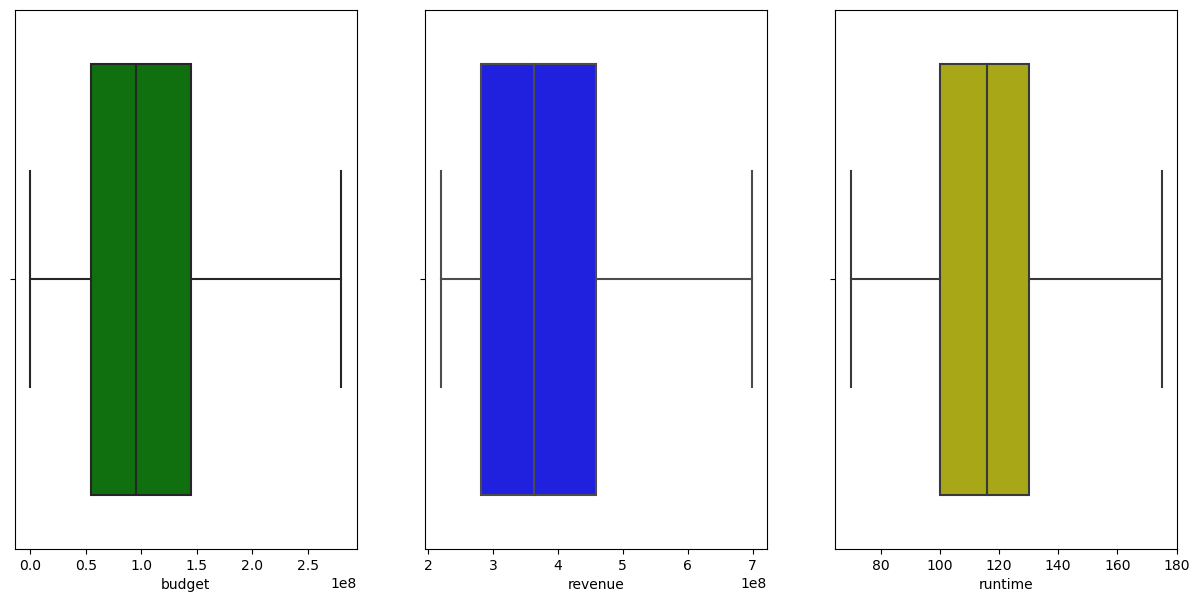

In [21]:
fig,ax=plt.subplots(1,3,figsize=(15,7))
sns.boxplot(x=top500['budget'],ax=ax[0],color='g')
sns.boxplot(x=top500['revenue'],ax=ax[1],color='b')
sns.boxplot(x=top500['runtime'],ax=ax[2],color='y')
plt.show()

# Task 11

In [47]:
above_avg=top500[top500['runtime']>118.72]
above_avg

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,458577595,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",25-04-2012,458577595,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",09-06-2015,458577595,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",01-04-2015,458577595,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",22-04-2015,458577595,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,60000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.theterminal-themovie.com/,594,"[{""id"": 242, ""name"": ""new york""}, {""id"": 822, ...",en,The Terminal,Viktor Navorski is a man without a country; hi...,57.753914,"[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",17-06-2004,219417255,128.0,"[{""iso_639_1"": ""bg"", ""name"": ""\u0431\u044a\u04...",Released,Life is waiting.,The Terminal,7.0,1910
397,85000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",http://itscomplicatedmovie.com/,22897,"[{""id"": 3687, ""name"": ""graduation""}, {""id"": 59...",en,It's Complicated,"Ten years after their divorce, Jane and Jake A...",16.479851,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",23-12-2009,219103655,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,First comes marriage. Then comes divorce. And ...,It's Complicated,6.2,360
1744,30000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",http://knockedupmovie.com/,4964,"[{""id"": 567, ""name"": ""alcohol""}, {"

In [48]:
titles=above_avg.loc[:,['title','runtime']]
titles

,title,runtime
0,Avatar,162.0
16,The Avengers,143.0
28,Jurassic World,124.0
44,Furious 7,137.0
7,Avengers: Age of Ultron,141.0
...,...,...
521,The Terminal,128.0
397,It's Complicated,121.0
1744,Knocked Up,129.0
717,Jack Reacher,130.0
